### Working with MNIST Data

In [15]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier  ## Stochastic Gradient Descent Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, \
                            roc_auc_score

import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784',version=1)

In [3]:
mnist.keys()  ##dictionary with data and features stored as values

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y = mnist['data'], mnist['target']

#### Looking at one of the images

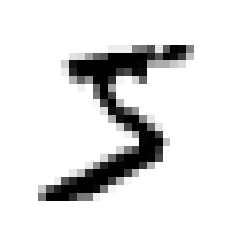

In [5]:
random_digit = X[0]

## its a 28x28 pixel image, so reshaping the features
random_digit_image = random_digit.reshape(28,28)

plt.imshow(random_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [9]:
print(y[0])
print(type(y[0]))

5
<class 'str'>


In [14]:
## Converting y to int
y = y.astype(np.uint8)

### Building a binary classifier first

In [16]:
y_5 = (y==5)

## Splitting into test and train
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y_5, test_size=0.3, random_state=42, stratify=y_5)

In [18]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_5, y_train_5)

sgd_clf.predict(random_digit.reshape(1, -1))

array([ True])

In [19]:
## Evaluate SGDClassifier using cross_val_score

cross_val_score(sgd_clf, X_train_5, y_train_5, cv=3, scoring='accuracy')

array([0.96791968, 0.94581522, 0.9645503 ])

In [21]:
unique, counts = np.unique(y_train_5, return_counts=True)

print(np.asarray((unique, counts)).T)  ## only 10% are true and 90% are false

[[    0 44581]
 [    1  4419]]


In [23]:
y_train_5_pred = cross_val_predict(sgd_clf, X_train_5, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_5_pred)

array([[43290,  1291],
       [  697,  3722]], dtype=int64)

In [24]:
precision_score(y_train_5, y_train_5_pred)

0.7424695790943546

In [25]:
recall_score(y_train_5, y_train_5_pred)

0.8422720072414573

In [26]:
f1_score(y_train_5, y_train_5_pred)

0.789228159457167

In [27]:
y_scores_5 = cross_val_predict(sgd_clf, X_train_5, y_train_5, cv=3, method='decision_function')

In [28]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_5)

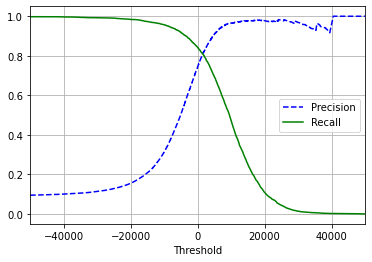

In [32]:
## Plot precision recall curve
def plot_precision_recall_curve(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds, recalls[:-1],'g-',label='Recall')
    plt.legend(loc="center right")
    plt.xlabel('Threshold')
    plt.grid(True)
    plt.xlim(right=50000) #xmax is your value
    plt.xlim(left=-50000) #xmin is your value
    
plot_precision_recall_curve(precisions, recalls, thresholds)
plt.show()

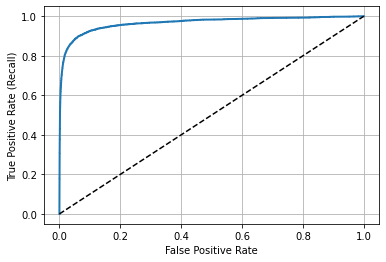

In [33]:
## Plot roc curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores_5)

def plot_roc(fpr, tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(True)
    
plot_roc(fpr, tpr)
plt.show()

In [34]:
roc_auc_score(y_train_5, y_scores_5)

0.9664142665042512